In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import pandas as pd

In [2]:
pf = pd.read_csv("car_price.csv")

In [3]:
pf

,Mileage,Ages,SellPrice
0,69000,6,18000
1,35000,3,33400
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


# scaling of data

In [4]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(pf.drop('SellPrice', axis='columns'))
scaled_x

array([[0.67883212, 0.66666667],
       [0.18248175, 0.16666667],
       [0.50364964, 0.5       ],
       [0.        , 0.        ],
       [0.34306569, 0.33333333],
       [0.53284672, 0.5       ],
       [0.43065693, 0.5       ],
       [0.72262774, 0.66666667],
       [1.        , 1.        ],
       [0.64963504, 0.66666667]])

In [5]:
scaled_y = sy.fit_transform(pf['SellPrice'].values.reshape(pf.shape[0],1))
scaled_y

array([[0.21428571],
       [0.76428571],
       [0.50357143],
       [1.        ],
       [0.69642857],
       [0.52678571],
       [0.71428571],
       [0.26071429],
       [0.        ],
       [0.35714286]])

In [6]:
np.ones(shape = (2))
scaled_x.shape[1]

2

In [7]:
def batch_gradient_descent(x,y_true,epoch, learning_rate = 0.01):
    number_of_features = x.shape[1]
    w=np.ones(shape=(number_of_features))
    bias=0
    cost_list=[]
    epoch_list=[]
    total_samples=x.shape[0]
    for i in range(epoch):
        y_predicted = np.dot(w, scaled_x.T)+bias
        w_upgrade = -(2/total_samples)*(x.T.dot(y_true-y_predicted))
        b_grade = -(2/total_samples)*np.sum(y_true-y_predicted)
        w=w-learning_rate*(w_upgrade)
        bias=bias-learning_rate*(b_grade)
        cost = np.mean(np.square(y_predicted-y_true))
        if(i%10 == 0):
            cost_list.append(cost)
            epoch_list.append(i)
    return w,bias, cost, cost_list,epoch_list       
            

In [8]:
scaled_y.reshape(scaled_y.shape[0])

array([0.21428571, 0.76428571, 0.50357143, 1.        , 0.69642857,
       0.52678571, 0.71428571, 0.26071429, 0.        , 0.35714286])

In [9]:
w,bias,cost, cost_list,epoch_list = batch_gradient_descent(scaled_x , scaled_y.reshape(scaled_y.shape[0],),500) 

In [10]:
w

array([-0.01874515,  0.00602309])

In [11]:
bias

0.4579403186095841

In [12]:
cost

0.08250715794903138

In [13]:
cost_list

[0.9199054394136089,
 0.7065329517769096,
 0.5852707076154784,
 0.5132365461737681,
 0.46763642092535473,
 0.43634955172198914,
 0.41292627293882606,
 0.39393036107236246,
 0.37752699197344974,
 0.36273250541556784,
 0.34901579040045777,
 0.3360864880922664,
 0.32378245196601896,
 0.31200994403762705,
 0.30071185033940806,
 0.28985078349546345,
 0.27940009523336273,
 0.26933909182998256,
 0.25965048293665083,
 0.25031901734031287,
 0.24133074966991147,
 0.23267264263653362,
 0.22433234784291928,
 0.21629808175568715,
 0.20855855251549943,
 0.2011029140250873,
 0.19392073478778557,
 0.1870019748313036,
 0.18033696716634742,
 0.17391640188499152,
 0.16773131188347848,
 0.16177305966186067,
 0.15603332490171326,
 0.1505040926556231,
 0.1451776420528264,
 0.14004653546317833,
 0.13510360808198313,
 0.13034195790927197,
 0.12575493610322952,
 0.12133613769094691,
 0.11707939262174953,
 0.11297875714966006,
 0.10902850553245953,
 0.10522312203548838,
 0.10155729322887797,
 0.0980259005673818

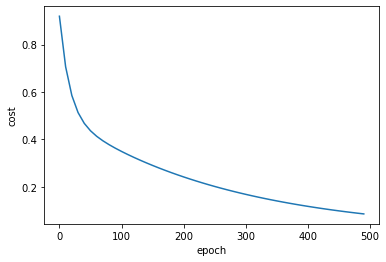

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [15]:
def predict_price(mileage,age,w,b):
    scaled_x = sx.transform([[mileage, age]])[0]
    scaled_price = scaled_x[0]*w[0]+scaled_x[1]*w[1]+b
    weight = sy.inverse_transform([[scaled_price]])[0][0]
    return weight

In [16]:
mileage = 35000
age = 3
predict_price(mileage,age,w,bias)

24754.658534178794

In [49]:
import random
def stochastic_descent(x,y_true,epoch,learning_rate=0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    bias = 0
    total_sample  = x.shape[0]
    cost_list=[]
    cost=0
    epoch_list =[]
    for i in range(epoch):
        random_index = random.randint(0,total_sample-1)
        sample_x = x[random_index]
        sample_y=y_true[random_index]
        y_predicted = np.dot(w,sample_x.T)
        w_grad = -(2/total_sample)*(sample_x.T.dot(sample_y-y_predicted))
        bias_grad = -(2/total_sample)*(sample_y-y_predicted)
        w = w-learning_rate*w_grad
        
        bias=bias-learning_rate*bias_grad
        cost = np.mean(np.square(sample_y-y_predicted))
        if(i%100==0):
            cost_list.append(cost)
            epoch_list.append(i)
    return w , cost , bias, cost_list , epoch_list    
    

In [51]:
w , cost,bias,cost_list, epoch_list = stochastic_descent( scaled_x, scaled_y.reshape(scaled_y.shape[0],) ,10000 )

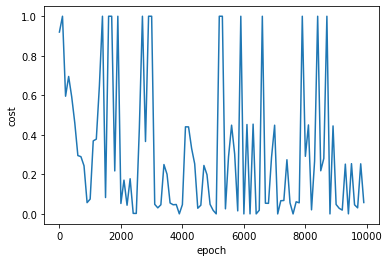

In [52]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)